### Explore text data

In [ ]:
# load important library

import re
import pandas as pd

In [2]:
# loading tweets data

tweets_data = pd.read_csv(r"/Users/nick_mac/Desktop/Natural-Language-Processing/datasets/tweets.csv",encoding = "ISO-8859-1")

In [3]:
# look at the data

tweets_data.head()

,text,favorited,favoriteCount,replyToSN,created,truncated,replyToSID,id,replyToUID,statusSource,screenName,retweetCount,isRetweet,retweeted
0,RT @rssurjewala: Critical question: Was PayTM ...,False,0.0,NaN,2016-11-23 18:40:30,False,NaN,8.014957e+17,NaN,"<a href=""http://twitter.com/download/android"" ...",HASHTAGFARZIWAL,331.0,True,False
1,RT @Hemant_80: Did you vote on #Demonetization...,False,0.0,NaN,2016-11-23 18:40:29,False,NaN,8.014957e+17,NaN,"<a href=""http://twitter.com/download/android"" ...",PRAMODKAUSHIK9,66.0,True,False
2,"RT @roshankar: Former FinSec, RBI Dy Governor,...",False,0.0,NaN,2016-11-23 18:40:03,False,NaN,8.014955e+17,NaN,"<a href=""http://twitter.com/download/android"" ...",rahulja13034944,12.0,True,False
3,RT @ANI_news: Gurugram (Haryana): Post office ...,False,0.0,NaN,2016-11-23 18:39:59,False,NaN,8.014955e+17,NaN,"<a href=""http://twitter.com/download/android"" ...",deeptiyvd,338.0,True,False
4,RT @satishacharya: Reddy Wedding! @mail_today ...,False,0.0,NaN,2016-11-23 18:39:39,False,NaN,8.014954e+17,NaN,"<a href=""http://cpimharyana.com"" rel=""nofollow...",CPIMBadli,120.0,True,False


***Generate word frequencies***

In [4]:
import spacy
nlp = spacy.load("en_core_web_sm")

/Users/nick_mac/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [8]:
# combinig all the tweets together

combined_tweets = ' '.join(tweets_data.text.values)
combined_tweets = re.sub('(\r\n|amp|<|>)+','',combined_tweets)
print(combined_tweets)

#Kashmir @ShefVaidya Another misfire from sold media after JNU , demonetization and UP election. After effects of demonetization... Even this has turned white https://t.co/SiVUFCVWSc @ShashiTharoor @PMOIndia v kn y BJP did demonetization. To safe guard ur sponsor's assets. Tell me hw many BJP big shots got raided. edU+00A0U+00BDedU+00B9U+0088edU+00A0U+00BDedU+00B9U+0089edU+00A0U+00BDedU+00B9U+008A I liked a @YouTube video https://t.co/hFaVt2zOCR YouTube Demonetization is Completely F*cking Random RT @Stupidosaur: @FrustuPlayer @shepherd66 @Scimitar_SS @Vaibhav_CFA @CashlessConsumr @prasanna_s @Synd_Bank @NandanNilekani @India_Stack @Â @FrustuPlayer @shepherd66 @Scimitar_SS @Vaibhav_CFA @CashlessConsumr @prasanna_s @Synd_Bank @NandanNilekaniÂ https://t.co/86Cy6Gx9cQ RT @dailyonion: 60,000 only? In a Nation, where less than 2% pay their income tax, &; 1% are "declared" crorepatis, how much has #demonetizaÂ @BJPKarITCell during one of the Manthana program about demonetization it was di

In [9]:
# creating documents

doc = nlp(combined_tweets)

In [13]:
# function to generate word frequency

def gen_word_freq(tokens):
    word_freq = pd.Series([token.text for token in tokens]).value_counts()
    print(word_freq[:20])
    return word_freq

word_freq = gen_word_freq(doc)

#                 5528
demonetization    2433
.                 2191
:                 2025
Demonetization    1887
,                 1730
to                1658
                 1642
the               1592
of                1584
RT                1369
in                1343
is                1085
on                 945
a                  816
and                711
India              662
's                 662
?                  654
-                  644
Name: count, dtype: int64


***word clouds***

In [15]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

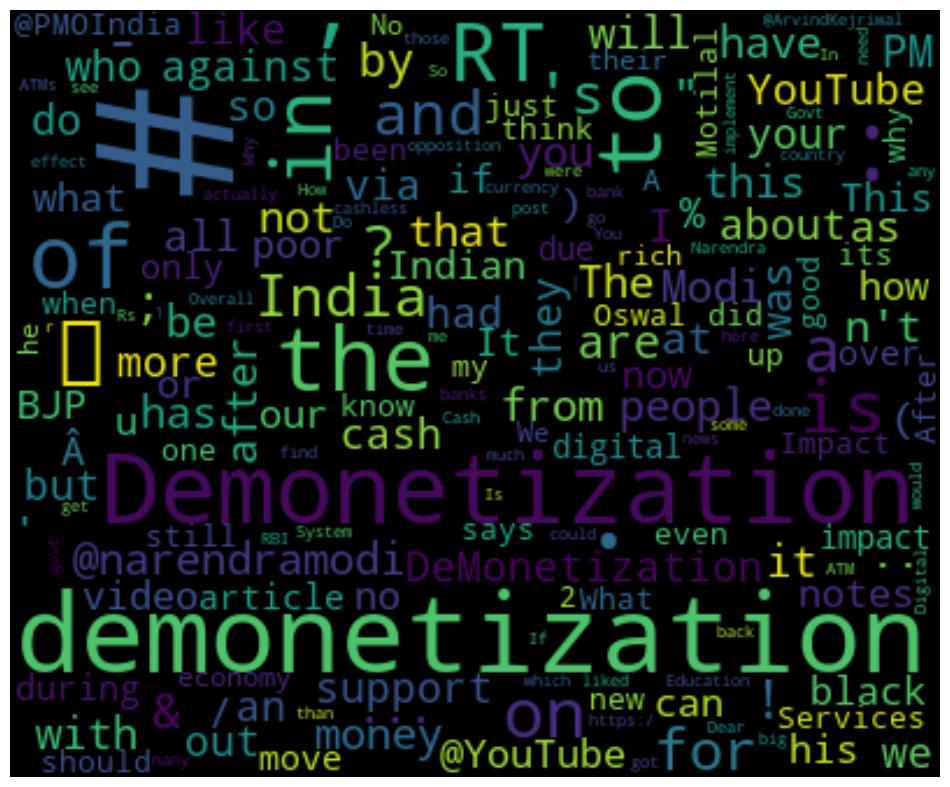

In [18]:
def gen_word_cloud(data):

    wc = WordCloud(width=400,height=330,max_words=200,background_color="black").generate_from_frequencies(data)

    plt.figure(figsize=(12,10))

    plt.imshow(wc,interpolation='bilinear')

    plt.axis("off")

    plt.show()

gen_word_cloud(word_freq)

***text cleaning***

In [26]:
# removing RT and # from the tweets
combined_tweets = re.sub('(RT|#)','',combined_tweets)

# converting to lower
combined_tweets = combined_tweets.lower()

# creating documents
doc = nlp(combined_tweets)

# removing stopwords and punct
tokens = [token for token in doc if (token.is_stop==False|token.is_punct==False)]


# getting words frequencies
word_freq = gen_word_freq(tokens)

demonetization    4525
                  1672
                 1358
india              698
modi               388
money              317
@narendramodi      314
people             308
pm                 286
                  284
cash               281
youtube            248
impact             183
like               162
black              160
digital            151
support            146
@youtube           142
govt               128
u                  127
Name: count, dtype: int64


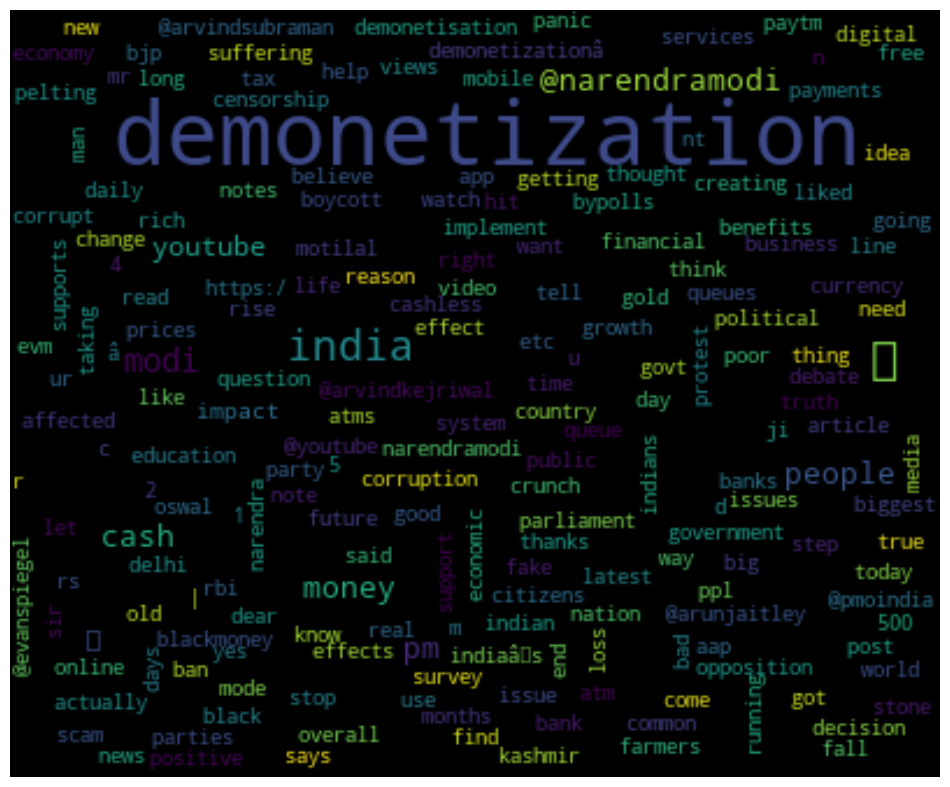

In [22]:
gen_word_cloud(word_freq)

***text preprocessing part 2***

In [28]:
combined_tweets = ' '.join([token.text for token in tokens])

combined_tweets = re.sub('(\r\n|amp|<|>)+','',combined_tweets)

# creating documents
doc = nlp(combined_tweets)

# removing stopwords and punct
tokens = [token for token in doc if (token.is_space==False)]

# getting words frequencies
word_freq = gen_word_freq(tokens)

demonetization    4525
india              698
modi               388
money              318
@narendramodi      314
people             308
pm                 287
cash               281
youtube            248
impact             183
like               162
black              160
digital            151
support            146
@youtube           142
govt               128
u                  127
bjp                122
indian             119
new                118
Name: count, dtype: int64


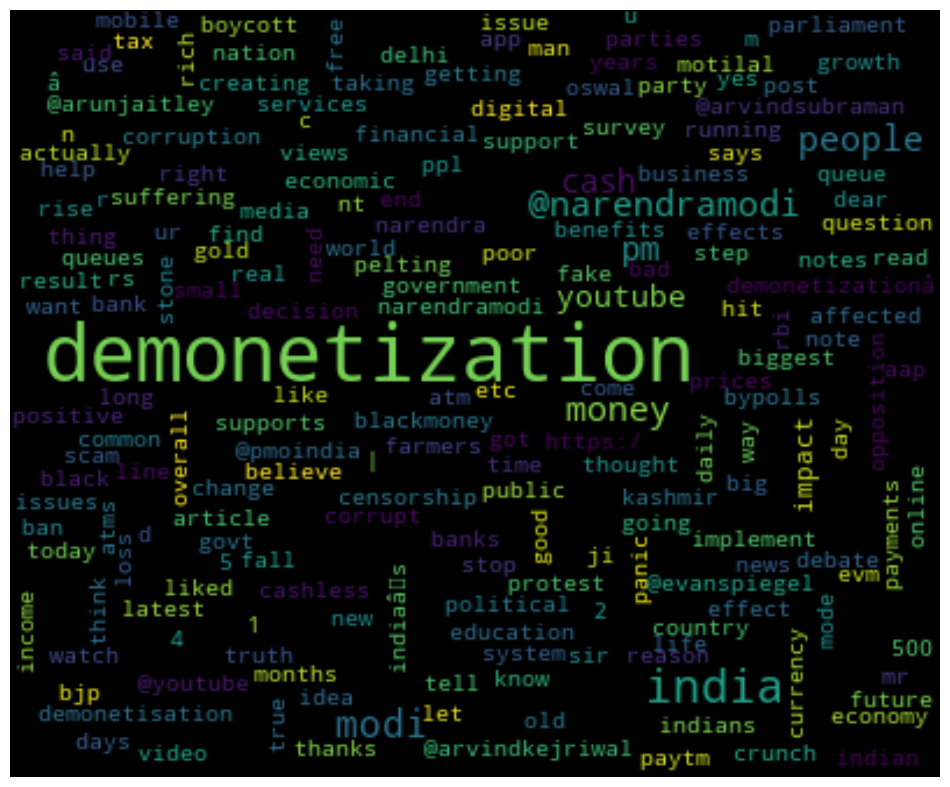

In [29]:
gen_word_cloud(word_freq)